In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F


plt.rcParams["savefig.bbox"] = "tight"


def plot(imgs, num_rows, num_cols, **imshow_kwargs):
    shape = imgs.shape
    new_shape = (num_rows,num_cols) + shape[1:]
    imgs = imgs.view(new_shape)

    num_rows = len(imgs)
    num_cols = len(imgs[0])
    _, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            img = F.to_pil_image(img.to("cpu"))
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    plt.tight_layout()

In [ ]:
from dataloader import VERandomDataset

from torchvision.transforms.v2 import Resize, CenterCrop, Compose
from dataloader.transforms import AbsFFT
from torch.fft import fft

ds = VERandomDataset(
    csv_file="datasets/share_datasets/fold_csv_files/MDMER_fold_csv/MDMER_dataset_updated_fold0.csv",
    eeg_sampling_rate=500,
    time_window = 5.0, #sec
    video_transform=Compose(
        [CenterCrop(size=(480,480)),
        Resize(size=(224,224))],
    ),
    eeg_transform = AbsFFT(dim=-2),
)

In [6]:
sample = ds[0]

In [7]:
sample["video"].shape

torch.Size([32, 3, 224, 224])

In [8]:
sample["eeg"].shape

torch.Size([32, 64, 18])

In [9]:
sample["eeg"].dtype

torch.complex64

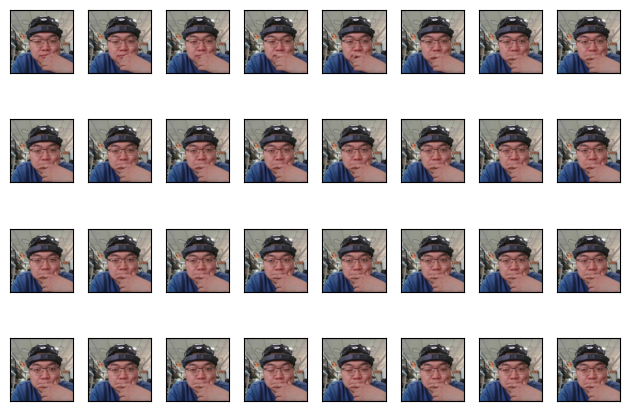

In [22]:
plot(sample["video"], 4, 8)

In [ ]:
sample["eeg"].size()

torch.Size([30, 10000])